<a href="https://colab.research.google.com/github/lakepicnic/Section_project/blob/main/Section2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 직원 이직률


이 데이터베이스는 미국의 큰 회사에서 가져왔다. 


관리 부서에서는 상대적으로 높은 이직률에, 회사를 떠나는 직원의 직원의 수를 줄이는 방법을 찾고, 떠날 가능성이 높은 상황과 이유를 이해해야 한다.

따라서 다양한 컬럼들을 이용해 직원들의 이직 여부 문제(분류)로 예측하고자 한다. 




# 데이터셋 컬럼 설명

" department " - 직원이 속한 부서

" promoted " - 직원이 지난 24개월 동안 승진한 경우 1, 그렇지 않은 경우 

" review " - 직원이 마지막 평가에서 받은 종합 점수입니다.

" projects " - 직원이 관련된 프로젝트 수.

" salary " - 기밀 유지를 위해 급여는 낮음, 중간, 높음의 세 단계로 나뉩니다.

" tenure " - 직원이 회사에서 몇 년 동안 근무했는지.

" satisfaction " - 설문 조사에서 직원 만족도 측정.

" bonus " - 직원이 지난 24개월 동안 보너스를 받은 경우 1, 그렇지 않은 경우 0.

" avg_hrs_month " - 직원이 한 달에 일한 평균 시간.

" left " - 직원이 결국 떠나면 "yes", 그렇지 않으면 "no"입니다.

데이터셋 출처: https://www.kaggle.com/datasets/marikastewart/employee-turnover

# 데이터업로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving employee_churn_data.csv to employee_churn_data.csv


In [3]:
df = pd.read_csv("employee_churn_data.csv")
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5,0.577607,1,179.821083,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   int64  
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 745.4+ KB


In [5]:
# 결측치 확인
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [6]:
df = df.iloc[:,1:]
df

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,0,0.577569,3,low,5,0.626759,0,180.866070,no
1,0,0.751900,3,medium,6,0.443679,0,182.708149,no
2,0,0.722548,3,medium,6,0.446823,0,184.416084,no
3,0,0.675158,4,high,8,0.440139,0,188.707545,no
4,0,0.676203,3,high,5,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...
9535,0,0.610988,4,medium,8,0.543641,0,188.155738,yes
9536,0,0.746887,3,medium,8,0.549048,0,188.176164,yes
9537,0,0.557980,3,low,7,0.705425,0,186.531008,yes
9538,0,0.584446,4,medium,8,0.607287,1,187.641370,yes


# 데이터를 훈련/테스트 세트로 분리

In [7]:
from sklearn.model_selection import train_test_split

target = 'left'
train, test = train_test_split(df, train_size=0.8, test_size = 0.2, stratify = df[target], random_state = 2)       

# 타겟 분포 확인

In [8]:
train['left'].replace({'yes':1, 'no':0}, inplace = True)
test['left'].replace({'yes':1, 'no':0}, inplace = True)

In [9]:
train['left'].value_counts(normalize = True)

0    0.708202
1    0.291798
Name: left, dtype: float64

Text(0.5, 1.0, 'Employees Turnover')

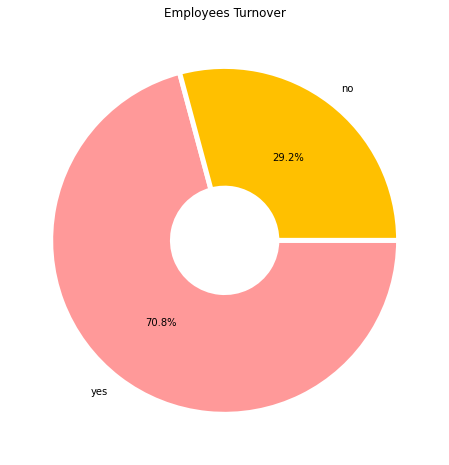

In [10]:
# 타겟 특성의 클래스 비율이 차이남 -> 데이터 불균형
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
train['left'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000'], counterclock = False, wedgeprops = wedgeprops, labels = ["yes", "no"])
plt.ylabel("")
plt.title("Employees Turnover")

# 타겟과의 상관계수

In [11]:
train.corr()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,0.002878,0.008079,0.000631,-0.013117,0.008959,-0.001573,-0.033489
review,0.002878,1.000000,0.004717,-0.180947,-0.351947,-0.007233,-0.193017,0.299587
projects,0.008079,0.004717,1.000000,0.028428,-0.001331,-0.001442,0.027737,-0.004439
tenure,0.000631,-0.180947,0.028428,1.000000,-0.152204,-0.000504,0.978430,0.015386
satisfaction,-0.013117,-0.351947,-0.001331,-0.152204,1.000000,-0.000640,-0.149261,-0.004784
bonus,0.008959,-0.007233,-0.001442,-0.000504,-0.000640,1.000000,0.000669,-0.022840
avg_hrs_month,-0.001573,-0.193017,0.027737,0.978430,-0.149261,0.000669,1.000000,0.016127
left,-0.033489,0.299587,-0.004439,0.015386,-0.004784,-0.022840,0.016127,1.000000


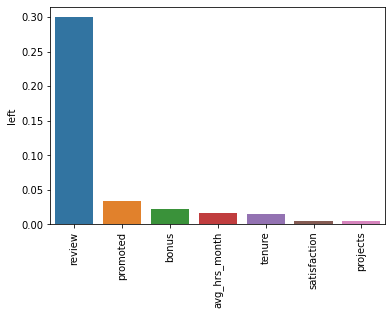

In [12]:
plt.xticks(rotation = 90)
sns.barplot(x = abs(train.corr()['left']).sort_values(ascending = False)[1:].index, y = abs(train.corr()['left']).sort_values(ascending = False)[1:])

#가설
1. review가 낮으면 이직률이 더 높을 것이다



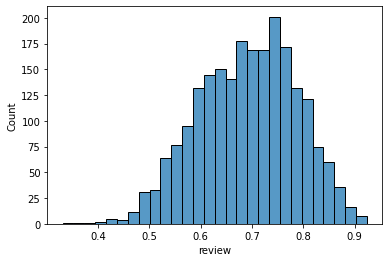

In [13]:
left = train[train['left'] == 1]
sns.histplot(left['review'])

2. 급여가 낮으면 이직률이 높을 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


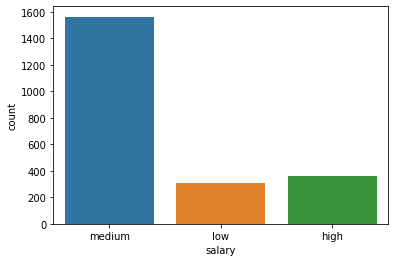

In [14]:
train['salary'].replace({'low':0, 'medium':1, 'high':2}, inplace = True)
test['salary'].replace({'low':0, 'medium':1, 'high':2}, inplace = True)
sns.countplot(left['salary'])

3. 직원이 한달동안 일한 시간 평균이 높을 수록 이직률이 높을 것이다. 


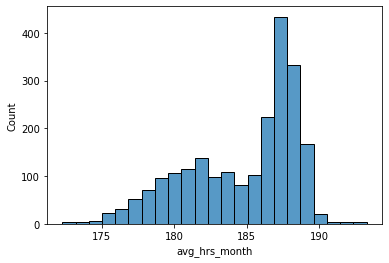

In [15]:
sns.histplot(left['avg_hrs_month'])

4. 직원의 만족도가 낮을수록 이직률이 높을 것이다.

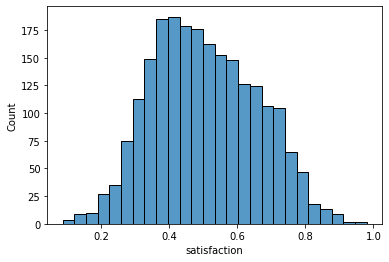

In [16]:
sns.histplot(left['satisfaction'])

#Baseline

In [17]:
X_train = train.drop(columns = target)
y_train = train[target]
X_test = test.drop(columns = target)
y_test = test[target]

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
pred = logistic.predict(X_test)

print('Accuacy Score: ', accuracy_score(y_test, pred))
print('ROC AUC Score: ', roc_auc_score(y_test, pred))

Accuacy Score:  0.7290356394129979
ROC AUC Score:  0.5654505539483353


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
